In [1]:
%pylab inline
import numpy as np
import pandas as pd
from math import tau, pi
𝜏, 𝜋 = tau, pi
pd.options.display.max_colwidth = 128
pylab.rcParams['figure.figsize'] = 12, 5
# d = pd.read_csv('...', parse_dates=['date'])
# pd.to_datetime(d['timestamp'], unit='s')
# with mpl.rc_context({"figure.figsize": (5, 5)}):
# with mpl.rc_context({"lines.linewidth": 2, "lines.color": "r"}):
# plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
# ax.set_xlabel('x label')

Populating the interactive namespace from numpy and matplotlib


In [80]:
d = pd.read_csv('daylight.csv', parse_dates=['date'])

In [81]:
d.head()

,date,hours_sunlight
0,1986-01-17,10.027295
1,1986-01-18,10.050219
2,1986-01-19,10.073791
3,1986-01-20,10.097994
4,1986-01-21,10.122811


In [82]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13327 entries, 0 to 13326
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            13327 non-null  datetime64[ns]
 1   hours_sunlight  13327 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 208.4 KB


In [71]:
t = pd.read_csv('USR0000ATUS.csv', parse_dates=['DATE'])

In [72]:
t.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES
0,USR0000ATUS,1986-01-17,35.99,-112.12,2042.2,"TUSAYAN ARIZONA, AZ US",11,"H,,U",-33,"H,,U",-21,",,U"
1,USR0000ATUS,1986-01-18,35.99,-112.12,2042.2,"TUSAYAN ARIZONA, AZ US",100,"H,,U",-44,"H,,U",-6,",,U"
2,USR0000ATUS,1986-01-19,35.99,-112.12,2042.2,"TUSAYAN ARIZONA, AZ US",144,"H,,U",-28,"H,,U",54,",,U"
3,USR0000ATUS,1986-01-20,35.99,-112.12,2042.2,"TUSAYAN ARIZONA, AZ US",117,"H,,U",-44,"H,,U",-4,",,U"
4,USR0000ATUS,1986-01-21,35.99,-112.12,2042.2,"TUSAYAN ARIZONA, AZ US",78,"H,,U",-83,"H,,U",-34,",,U"


In [73]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13072 entries, 0 to 13071
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATION          13072 non-null  object        
 1   DATE             13072 non-null  datetime64[ns]
 2   LATITUDE         13072 non-null  float64       
 3   LONGITUDE        13072 non-null  float64       
 4   ELEVATION        13072 non-null  float64       
 5   NAME             13072 non-null  object        
 6   TMAX             13072 non-null  int64         
 7   TMAX_ATTRIBUTES  13072 non-null  object        
 8   TMIN             13072 non-null  int64         
 9   TMIN_ATTRIBUTES  13072 non-null  object        
 10  TAVG             13072 non-null  int64         
 11  TAVG_ATTRIBUTES  13072 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 1.2+ MB


In [87]:
# Map all years to 2000 to make the data points coincide.

d2 = d.copy()
d2['date'] = d2['date'].apply(lambda dt: dt.replace(year=2020))
d2 = d2.groupby('date').mean()
d2.head()

,hours_sunlight
date,
2020-01-01,9.762376
2020-01-02,9.772839
2020-01-03,9.784178
2020-01-04,9.796382
2020-01-05,9.809442


In [100]:
t2 = t[['DATE', 'TMAX']].copy()
t2 = t2.rename(columns={'DATE': 'date'})
t2['date'] = t2['date'].apply(lambda dt: dt.replace(year=2020))
t2['TMAX'] = t2['TMAX'] / 10.0
t2 = t2.groupby('date').mean()
t2.head()

,TMAX
date,
2020-01-01,6.076471
2020-01-02,5.950000
2020-01-03,7.080000
2020-01-04,7.894286
2020-01-05,7.142857


In [101]:
j = t2.join(d2)
j.head()

,TMAX,hours_sunlight
date,,
2020-01-01,6.076471,9.762376
2020-01-02,5.950000,9.772839
2020-01-03,7.080000,9.784178
2020-01-04,7.894286,9.796382
2020-01-05,7.142857,9.809442


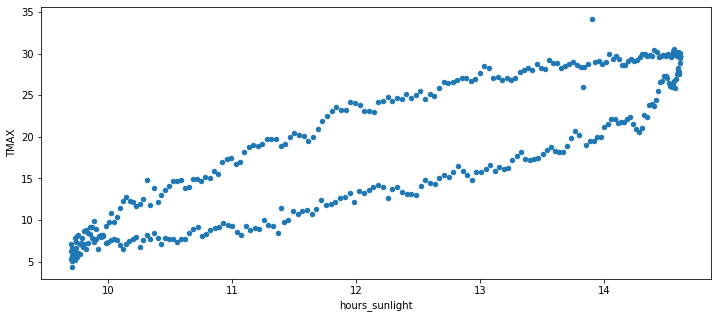

In [104]:
j.plot.scatter('hours_sunlight', 'TMAX')